In [90]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import datetime
from os.path import isfile,join
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [91]:
def get_url_resp(country="Worldwide"):
    base_url = "https://www.worldometers.info/coronavirus/"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:74.0) Gecko/20100101 Firefox/74.0"}
    if country =="Worldwide":
        url = base_url
    else:
        url =base_url+"country/"+country+"/"
    response = requests.get(url, headers = headers)
    html = response.text
    return BeautifulSoup(html,"html.parser")

def format_case_numbers(soup,country="Worldwide"):
    if country == "Worldwide":
        soup_selector = soup.select(".col-md-6")
        val = [soup_selector[2].find_all(type="text/javascript")[0],soup_selector[3].find_all(type="text/javascript")[0]]
    else:
        soup_selector = soup.find_all("script")
        new_soup =[]
        for i in range(len(soup_selector)):
            if 'categories' in str(soup_selector[i]):
                new_soup.append(soup_selector[i])
        val = new_soup#[:2]
    return val

def get_right_element(val,Status = "Cases"):
    string1 = f"'Total Coronavirus {Status}'"
    new_soup =[]
    for i in range(len(val)):
        if string1 in str(val[i]):
            new_soup.append(val[i])
    return new_soup

def get_both_elements(val):#,country="Worldwide"):
    # if country=="Worldwide":
    #     return val
    # else:
    statuses_tuple = ("Cases","Deaths")
    new_soup = []
    for sta in statuses_tuple:
        new_soup.append(get_right_element(val,sta))
    return new_soup

def get_case_numbers_from_soup(val):#,country="Worldwide",status="Cases"):
    #dates = val.get_text().rsplit("categories",1)[1].split("[")[1].split("]")[0]
    dates = val.get_text().rsplit("categories")[1].split("[")[1].split("]")[0]
    case_num = val.get_text().rsplit("data")[1].split("[")[1].split("]")[0]
    case_num_formatted=case_num.split(',')
    dates_formatted=dates.split(',')
    case_num_lst=[]
    date_lst = []
    # for lst in case_num_lst,date_lst:
    #     lst.append(country)
    #     lst.append(status)

    for i in range(len(case_num_formatted)):
        if case_num_formatted[i] == "null":
            case_num_input = 0
        else:
            case_num_input = int(case_num_formatted[i])
        case_num_lst.append(case_num_input)

    for i in dates_formatted:
        date_lst.append(i.replace('"',''))
    return zip(date_lst,case_num_lst)

def get_case_dictionary(country="Worldwide"):#,status="Cases"):
    soup = get_url_resp(country)
    new_soup1 = format_case_numbers(soup,country)
    val = get_both_elements(new_soup1)
    statuses_tuple = ("Cases","Deaths")
    statuses = {
        "Cases":0,
        "Deaths":1,
    }
    lst=[]
    for sta in statuses_tuple:
        lst.append(dict(get_case_numbers_from_soup(val[statuses[sta]][0])))
    return lst
    #return dict(get_case_numbers_from_soup(val[statuses[status]]))#,country,status)
    # return get_case_numbers_from_soup(val[statuses[status]],country,status)


In [92]:
Countries = ("Worldwide","China","US","Italy","Spain","Germany","France","UK","India","South-Korea","Iran","Netherlands","Belgium","Switzerland","Turkey","Sweden","Indonesia","Portugal")
statuses_tuple = ("Cases","Deaths")
lst=[[],[]]
for country in Countries:
    for sta in statuses_tuple:
        lst[0].append(country)
        lst[1].append(sta)
### WORKS TO HERE ###
# lst = [["Worldwide","US"],["Cases","Cases"]]

data=[]
for country in Countries:
    country_data=get_case_dictionary(country=country)
    data.extend(country_data)

In [93]:
tuples = list(zip(*lst))
index = pd.MultiIndex.from_tuples(tuples)
cols = list(data[0].keys())

In [94]:
df = pd.DataFrame(data=data,index=index,dtype=pd.Int64Dtype())
df

Jan 22  Jan 23  Jan 24  Jan 25  Jan 26  Jan 27  Jan 28  \
Worldwide   Cases      580     845    1317    2015    2800    4581    6058   
            Deaths      17      25      41      56      80     106     132   
China       Cases      571     830    1287    1975    2744    4515    5974   
            Deaths      17      25      41      56      80     106     132   
US          Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Italy       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Spain       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Germany     Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
France      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
UK          Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
India       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
South-Korea Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Iran        Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Netherlands Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Belgium     Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Switzerland Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Turkey      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Sweden      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Indonesia   Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Portugal    Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   

                    Jan 29  Jan 30  Jan 31  ...  Mar 24  Mar 25  Mar 26  \
Worldwide   Cases     7813    9823   11950  ...  422574  471035  531865   
            Deaths     170     213     259  ...   18894   21282   24073   
China       Cases     7711    9692   11791  ...   81218   81285   81340   
            Deaths     170     213     259  ...    3281    3287    3292   
US          Cases     <NA>    <NA>    <NA>  ...   54856   68211   85435   
            Deaths    <NA>    <NA>    <NA>  ...     780    1027    1295   
Italy       Cases     <NA>    <NA>    <NA>  ...   69176   74386   80589   
            Deaths    <NA>    <NA>    <NA>  ...    6820    7503    8215   
Spain       Cases     <NA>    <NA>    <NA>  ...   42058   49515   57786   
            Deaths    <NA>    <NA>    <NA>  ...    2991    3647    4365   
Germany     Cases     <NA>    <NA>    <NA>  ...   32991   37323   43938   
            Deaths    <NA>    <NA>    <NA>  ...     159     206     267   
France      Cases     <NA>    <NA>    <NA>  ...   22304   25233   29155   
            Deaths    <NA>    <NA>    <NA>  ...    1100    1331    1696   
UK      

In [95]:
df.xs('Deaths',level=1)

,Jan 22,Jan 23,Jan 24,Jan 25,Jan 26,Jan 27,Jan 28,Jan 29,Jan 30,Jan 31,...,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29,Mar 30,Mar 31,Apr 01,Apr 02
Worldwide,17,25,41,56,80,106,132,170,213,259,...,18894,21282,24073,27343,30861,34065,37774,42309,47198,53167
China,17,25,41,56,80,106,132,170,213,259,...,3281,3287,3292,3295,3300,3300,3305,3312,3318,3318
US,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,780,1027,1295,1695,2220,2583,3141,4053,5102,6070
Italy,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915
Spain,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,2991,3647,4365,5138,5982,6803,7716,8464,9387,10348
Germany,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,159,206,267,351,433,541,645,775,931,1107
France,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387
UK,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,422,463,578,759,1019,1228,1408,1789,2352,2921
India,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,10,12,20,20,24,27,32,35,58,72
South-Korea,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,120,126,131,139,144,152,158,162,165,169


In [96]:
df.xs('Deaths',level=1)[df.columns[-14:]]

,Mar 20,Mar 21,Mar 22,Mar 23,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29,Mar 30,Mar 31,Apr 01,Apr 02
Worldwide,11386,13011,14640,16513,18894,21282,24073,27343,30861,34065,37774,42309,47198,53167
China,3255,3261,3270,3277,3281,3287,3292,3295,3300,3300,3305,3312,3318,3318
US,255,301,414,555,780,1027,1295,1695,2220,2583,3141,4053,5102,6070
Italy,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915
Spain,1093,1381,1772,2311,2991,3647,4365,5138,5982,6803,7716,8464,9387,10348
Germany,68,84,94,123,159,206,267,351,433,541,645,775,931,1107
France,450,562,674,860,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387
UK,177,233,281,335,422,463,578,759,1019,1228,1408,1789,2352,2921
India,5,5,7,10,10,12,20,20,24,27,32,35,58,72
South-Korea,94,102,104,111,120,126,131,139,144,152,158,162,165,169


In [97]:
def squeeze_nan(x, hold):
    if x.name not in hold:
        original_columns = x.index.tolist()

        squeezed = x.dropna()
        squeezed.index = [original_columns[n] for n in range(squeezed.count())]

        return squeezed.reindex(original_columns, fill_value=np.nan)
    else:
        return x

filter_num = 2000
filter_cases='Deaths'
start_num =500

df1 = df.xs(filter_cases,level = 1).fillna(0)
df2 = df1[df1>start_num]
df3 = df2.apply(lambda x: squeeze_nan(x, ['B']), axis=1).drop('Worldwide')
df3.columns=[f"Day {day+1}" for day in range(len(df3.columns.values.tolist()))]
keep_cols = df3.drop("China").dropna(how='all',axis=1).columns.values.tolist()
keep_indices = df3[df3>filter_num].dropna(how='all').index.values.tolist()
days = len(keep_cols)
# keep_indices = Countries
# keep_indices = ('Italy','Spain', 'France','US','UK')
all_indices = df3.index.values.tolist() 
drop_indices = [val for val in all_indices if val not in keep_indices]
df4_1 = df3[df3.columns[0:days]].drop(drop_indices).dropna(how='all').astype('Int64')
df4 = df4_1.sort_values(by=df4_1.columns.values.tolist()[::-1],ascending=True).drop("China").drop("Iran")
df4

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 15,Day 16,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24
Italy,631,827,1016,1266,1441,1809,2158,2503,2978,3405,...,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915
Spain,533,638,831,1093,1381,1772,2311,2991,3647,4365,...,8464,9387,10348,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
France,562,674,860,1100,1331,1696,1995,2314,2606,3024,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
US,555,780,1027,1295,1695,2220,2583,3141,4053,5102,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
UK,578,759,1019,1228,1408,1789,2352,2921,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


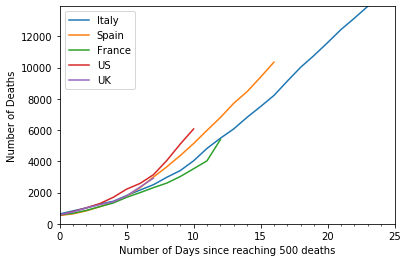

In [102]:
for country in df4.T.columns.values.tolist():
    line = df4.T[country].dropna().plot()
line.legend()
line.set_ylim((0,max(df4.max())))
line.set_xlim((0,days))
line.set_ylabel(f'Number of {filter_cases}')
line.set_xlabel(f'Number of Days since reaching {start_num} {filter_cases.lower()}')
# line.set_title(f'Number of Deaths after reaching {filter_num}')
# line.annotate('Italy in lockdown',xy=(3,500),xytext=(3, 4000),
#                 arrowprops=dict(facecolor='black', shrink=0.05),)
line.xaxis.set_major_locator(MultipleLocator(5))
line.xaxis.set_major_formatter(FormatStrFormatter('%d'))
line.xaxis.set_minor_locator(MultipleLocator(1))

plt.savefig(join("Coronavirus Graphs",f'Cumulative {filter_cases.lower()} {start_num} showing {days} days'))

In [99]:
filename_h="hourly cases.csv"
df_head_h=pd.read_csv(filename_h,nrows=0)
df_head_lst_h = list(df_head_h)[2:]
data_types_h = {val:pd.Int64Dtype() for val in df_head_lst_h}

month_dict ={3:"Mar",4:"Apr"}

df_h = pd.read_csv(filename_h,index_col=[0,1],dtype=data_types_h).drop('Recovered',level=1).iloc[:,-1]
todays_date = month_dict[datetime.datetime.utcnow().month]+" "+str(datetime.datetime.utcnow().day)
df_h.name = todays_date
df_h

Belgium      Cases       16770
             Deaths       1143
China        Cases       81620
             Deaths       3322
France       Cases       59105
             Deaths       5387
Germany      Cases       85063
             Deaths       1111
India        Cases        2567
             Deaths         72
Indonesia    Cases        1986
             Deaths        181
Iran         Cases       53183
             Deaths       3294
Italy        Cases      115242
             Deaths      13915
Netherlands  Cases       14697
             Deaths       1339
Portugal     Cases        9034
             Deaths        209
South-Korea  Cases       10062
             Deaths        174
Spain        Cases      117710
             Deaths      10935
Sweden       Cases        5568
             Deaths        308
Switzerland  Cases       19145
             Deaths        573
Turkey       Cases       18135
             Deaths        356
UK           Cases       33718
             Deaths       2921
US      

In [100]:
#attach latest hourly update to the end
df_copy = df.copy()

filter_num = 2000
filter_cases='Deaths'
start_num =500

if todays_date in df_copy.columns.values.tolist():
    df_copy0 = df_copy
else:
    df_copy0 = df_copy.join(df_h,how='outer')
df_copy1 = df_copy0.xs(filter_cases,level = 1).fillna(0)
df_copy2 = df_copy1[df_copy1>start_num]
df_copy3 = df_copy2.apply(lambda x: squeeze_nan(x, ['B']), axis=1).drop('Worldwide')
df_copy3.columns=[f"Day {day+1}" for day in range(len(df_copy3.columns.values.tolist()))]
keep_cols = df_copy3.drop("China").dropna(how='all',axis=1).columns.values.tolist()
keep_indices = df_copy3[df_copy3>filter_num].dropna(how='all').index.values.tolist()
days = len(keep_cols)
# keep_indices = Countries
# keep_indices = ('Italy','Spain', 'France','US','UK')
all_indices = df_copy3.index.values.tolist() 
drop_indices = [val for val in all_indices if val not in keep_indices]
df_copy4_1 = df_copy3[df_copy3.columns[0:days]].drop(drop_indices).dropna(how='all').astype('Int64')
df_copy4 = df_copy4_1.sort_values(by=df_copy4_1.columns.values.tolist()[::-1],ascending=True)
df_copy4

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 16,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24,Day 25
China,563,636,722,811,908,1016,1113,1259,1380,1523,...,2236,2345,2442,2592,2663,2715,2744,2788,2835,2870
Italy,631,827,1016,1266,1441,1809,2158,2503,2978,3405,...,7503,8215,9134,10023,10779,11591,12428,13155,13915,13915
Iran,514,611,724,853,988,1135,1284,1433,1556,1685,...,2517,2640,2757,2898,3036,3160,3294,<NA>,<NA>,<NA>
Spain,533,638,831,1093,1381,1772,2311,2991,3647,4365,...,9387,10348,10935,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
France,562,674,860,1100,1331,1696,1995,2314,2606,3024,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
US,555,780,1027,1295,1695,2220,2583,3141,4053,5102,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
UK,578,759,1019,1228,1408,1789,2352,2921,2921,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


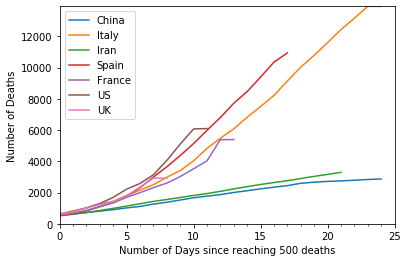

In [101]:
for country in df_copy4.T.columns.values.tolist():
    line = df_copy4.T[country].dropna().plot()
line.legend()
line.set_ylim((0,max(df_copy4.max())))
line.set_xlim((0,days))
line.set_ylabel(f'Number of {filter_cases}')
line.set_xlabel(f'Number of Days since reaching {start_num} {filter_cases.lower()}')
# line.set_title(f'Number of Deaths after reaching {filter_num}')
# line.annotate('Italy in lockdown',xy=(3,500),xytext=(3, 4000),
#                 arrowprops=dict(facecolor='black', shrink=0.05),)
line.xaxis.set_major_locator(MultipleLocator(5))
line.xaxis.set_major_formatter(FormatStrFormatter('%d'))
line.xaxis.set_minor_locator(MultipleLocator(1))

plt.savefig(join("Coronavirus Graphs",f'Cumulative {filter_cases.lower()} {start_num} showing {days} days'))